In [89]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv(r"C:/Users/USER/Desktop/Student-Performance-Analysis/Data/StudentsPerformance.csv")
print("First 5 rows of the dataset:")
display(df.head())


First 5 rows of the dataset:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [90]:
print("\nDataset shape:", df.shape)


Dataset shape: (1000, 8)


In [91]:
print("\nColumns in dataset:", df.columns)


Columns in dataset: Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [92]:
print("\nSummary statistics:")
display(df.describe())


Summary statistics:


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [93]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [94]:
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed.")
else:
     print("NO duplicated row.")


Number of duplicate rows: 0
NO duplicated row.


In [95]:
print("\nColumn names:")
print(df.columns)
df.rename(columns={
    'race/ethnicity': 'race_ethnicity',
    'parent level of education': 'parent_education',
    'test preparation course':'test_prep'
},inplace=True)
print("\nColumns after renaming:")
print(df.columns)


Column names:
Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Columns after renaming:
Index(['gender', 'race_ethnicity', 'parental level of education', 'lunch',
       'test_prep', 'math score', 'reading score', 'writing score'],
      dtype='object')


In [96]:
print("\nData types:")
print(df.dtypes)


Data types:
gender                         object
race_ethnicity                 object
parental level of education    object
lunch                          object
test_prep                      object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


In [97]:
print("Gender:", df['gender'].unique())
print("Test_prep", df['test_prep'].unique())
print("Lunch:", df['lunch'].unique())

Gender: ['female' 'male']
Test_prep ['none' 'completed']
Lunch: ['standard' 'free/reduced']


In [98]:
df[['math score','reading score', 'writing score']].describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [99]:
df.groupby('gender')[['math score','reading score', 'writing score']].mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [100]:
df.groupby('test_prep')[['math score','reading score', 'writing score']].mean()

,math score,reading score,writing score
test_prep,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [101]:
df[['math score','reading score', 'writing score']].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


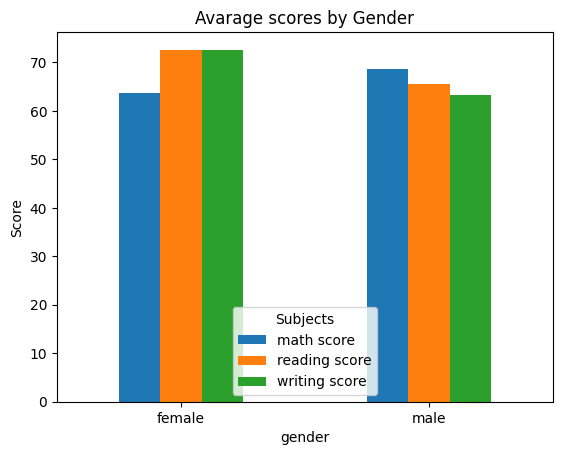

In [102]:
gender_scores = df.groupby('gender')[['math score','reading score', 'writing score']].mean()
gender_scores.plot(kind='bar')
plt.title("Avarage scores by Gender")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(title="Subjects")
plt.savefig("images/gender_scores.png")
plt.show()


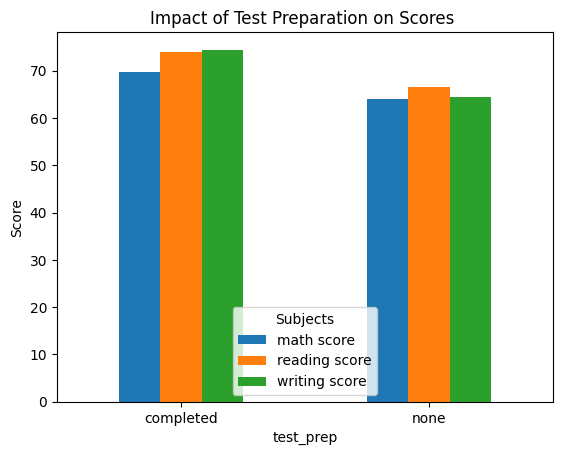

In [103]:
prep_scores = df.groupby('test_prep')[['math score','reading score', 'writing score']].mean()
prep_scores.plot(kind='bar')
plt.title("Impact of Test Preparation on Scores ")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(title="Subjects")
plt.savefig("images/prep_scores.png")
plt.show()

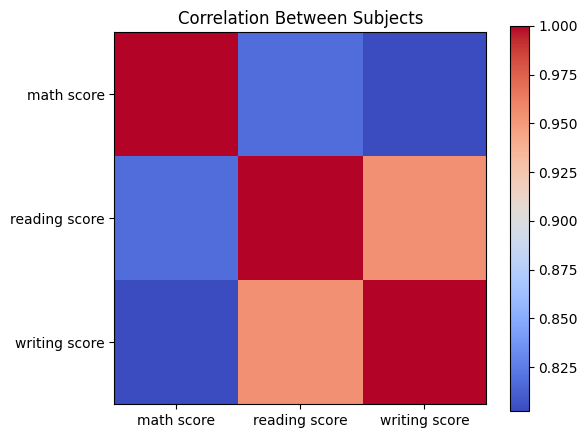

In [104]:
corr=df[['math score','reading score', 'writing score']].corr()
plt.figure(figsize=(6,5))
plt.imshow(corr, cmap='coolwarm')
plt.colorbar()
plt.xticks(ticks=np.arange(len(corr.columns)), labels=corr.columns)
plt.yticks(ticks=np.arange(len(corr.columns)), labels=corr.columns)
plt.title("Correlation Between Subjects")
plt.savefig("images/corr.png")
plt.show()

##  Final Conclusion

This project analyzed student performance data to identify the factors that influence academic outcomes in mathematics, reading, and writing.

### 1️⃣ Overall Performance
- Students performed best in **reading**, followed by **writing**, while **mathematics** had the lowest average score.
- Score distribution shows moderate variability, indicating differences in student performance levels.

### 2️⃣ Gender Differences
- Male students outperform females in **mathematics**.
- Female students significantly outperform males in **reading** and **writing**.
- The largest gender gap appears in writing.

### 3️⃣ Impact of Test Preparation
- Students who completed the **test preparation course** scored higher in all three subjects.
- The greatest improvement was observed in **writing**, with nearly a 10-point increase.
- This indicates that academic support programs can meaningfully improve student outcomes.

### 4️⃣ Relationship Between Subjects
- Strong positive correlation exists between all three subjects.
- **Reading and writing** show an extremely high correlation (r ≈ 0.95).
- Mathematics also has strong positive correlations with both reading and writing.
- Students who perform well in one subject are likely to perform well in others.

###  Final Insight
- **Test preparation** and **gender** are influential factors in student performance.
- Strong subject correlations highlight the interconnected nature of academic skills.
- Educational interventions, particularly test preparation programs, can significantly enhance student achievement across multiple subjects.
